# 1111 爬蟲


In [10]:
import requests
import json
import re
import csv
from bs4 import BeautifulSoup
import time

# 視覺化
import matplotlib.pyplot as plt
import pandas as pd # 引用套件並縮寫為 pd  

from pandas import Series, DataFrame 

job_url = 'https://www.1111.com.tw/job-bank/job-index.asp?si=1&ks={}&page={}'

DATA_PATH = '/tmp/hw_data'
filelist = []
words = []

# 抓出單頁


In [11]:
def get_list_page(url):
    
    HOST = 'https:'
    resp = requests.get(url)
    links = re.findall('<a href="(//www.1111.com.tw/job/.+/)" .+>.+</a>', resp.text)
    detail_page_links = [HOST + link for link in links]
    return detail_page_links    

In [7]:
!mkdir /tmp/hw_data

In [6]:
! rm -r -f /tmp/hw_data

In [12]:
def dump_page(url):  
    filename = url.split('/')[-2]
    resp = requests.get(url)
    with open(DATA_PATH + '/' + filename, 'w') as f:
        f.write(resp.text)
    return filename

In [13]:
def get_list(url):
    filename = url.split('/')[-2]
    filelist.append(filename)

In [14]:
def do_page(num1 ,a):   
    print('職缺 '+a)
    print('共抓'+str(num1)+'頁')
    count = 0
    filelist = []
    start = time.time()
    for page in range(num1) :
        the_url = job_url.format(a,page+1)
        for link in get_list_page(the_url):
            dump_page(link)
            count+=1
            get_list(link)
    end = time.time()
    elapsed = end - start
    print('共'+str(count)+'筆職缺')
    print("花費", elapsed, "秒")

In [19]:
do_page(50,'ETL')

職缺 ETL
共抓50頁
共48筆職缺
花費 42.89345169067383 秒


In [15]:
! ls /tmp/hw_data

In [164]:
filelist

[]

# 內文清理

In [21]:
words 

[]

In [22]:
#讀內文

for l in filelist:
    with open(DATA_PATH + '/' + l) as f:
        html = f.read()
        soup = BeautifulSoup(html, 'lxml')
        data = soup.find_all('div',{'class':'listContent'})
        for a in range(len(data)):
            words.extend(data[a].text.split('、'))
filelist = []

In [23]:
#建技能表
with open('skill.txt') as sk:
    skilllist =  sk.read()
skill = skilllist.split('\n')
skill.remove('')

In [24]:
# 計次歸零
counter = {}
for b in skill:
    counter[b]=0

In [25]:
# 計次
def get_skill(list):    
    for a in range(len(list)):
        word = list[a]
        if word in skill:                            
            counter[word]+=1
    return counter


In [26]:
dictskill = get_skill(words)

In [28]:
words = []

In [27]:
# 字典排序（轉成tuple）
countskill = sorted(dictskill.items(),key = lambda item:item[1],reverse=True)

In [158]:
#使用DataFrame
thedf = DataFrame([i for i in dictskill.items()],columns = ['技能','數量']) 

In [160]:
#使用DataFrame排序
newdf = thedf[thedf.數量 != 0].sort_values(["數量"],ascending=False)
newdf.index = range(len(newdf))

In [161]:
newdf

,技能,數量
10,JAVA,27
59,MS SQL,26
61,Oracle,13
60,MySQL,11
23,ASP.NET,9
66,LINUX,8
26,PHP,8
39,Obj-C,7
37,Python,7
50,jQuery,6


# 輸出Json 、 CSV

In [65]:
def get_json(dict,file):
    with open(file, 'w') as f:
        json.dump(dict,f)

In [20]:
def get_csv(dict,file):
    with open(file,'w') as f:
        w=csv.writer(f)
        # write all keys on one row and all values on the next
        w.writerow(dict.keys())
        w.writerow(dict.values())

In [29]:
def get_tupletocsv(list,file):

    with open(file,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['技能','數量'])
        for row in list:
            csv_out.writerow(row)

In [ ]:
#DataFrame轉成CSV
newdf.to_csv('data/test.csv',index=False)

In [ ]:
Y=newdf.loc[0:20,'技能']
X=newdf.loc[0:20,'數量']


plt.pie(X,labels=Y)
plt.title('TOP 20 Tools ')
plt.show()

# 視覺化

In [162]:
#用PANDAS開一個CSV
df = pd.read_csv('data/程式設計師技能.csv')  

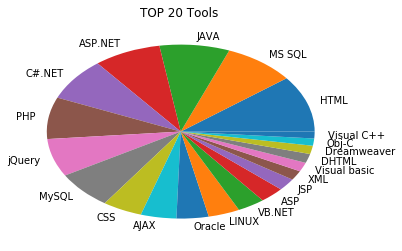

In [163]:
Y=df.loc[0:20,'技能']
X=df.loc[0:20,'數量']


plt.pie(X,labels=Y)
plt.title('TOP 20 Tools')
plt.show()